# Import and Load Dataset 

In [1]:
import sys
sys.path.insert(0, 'C:/Users/enioh/Documents/Github/MMA-ML-Model')

import pandas as pd 
import numpy as np 

from os.path import abspath, dirname, join

df = pd.read_csv(abspath(join(dirname(abspath('')), 'data/', 'processed/', 'extracted_stats.csv')))

# Model Loading

In [2]:
from src.models.XGBoost_Model import make_model
from src.models.train_model import train_model
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

clf = make_model()
clf, split_data = train_model(clf, df)

X_train, y_train, X_test, y_test = split_data

C:\Users/enioh/Documents/Github/MMA-ML-Model\src\models\train_model.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  post_comp_cols = df.loc[:, ~df.columns.str.contains('precomp_([a-zA-Z_]+)_vs_opp', regex=True)].columns.to_list() # All columns that do not have the precomp_ id or vs_opp id


Model Training Accuracy: 0.8848797250859106
Model Test Accuracy: 0.6214592274678111


In [3]:
X_train

,precomp_height_prior_vs_opp,precomp_height_avg_vs_opp,precomp_height_windowavg_vs_opp,precomp_height_var_vs_opp,precomp_height_windowvar_vs_opp,precomp_height_peak_vs_opp,precomp_height_low_vs_opp,precomp_height_delta_vs_opp,precomp_reach_prior_vs_opp,precomp_reach_avg_vs_opp,...,precomp_ground_strikes_accuracy_pM_differential_avg_vs_opp,precomp_ground_strikes_accuracy_pM_differential_peak_vs_opp,precomp_elo_differential_prior_vs_opp,precomp_elo_differential_avg_vs_opp,precomp_elo_differential_windowavg_vs_opp,precomp_elo_differential_var_vs_opp,precomp_elo_differential_windowvar_vs_opp,precomp_elo_differential_peak_vs_opp,precomp_elo_differential_low_vs_opp,precomp_elo_differential_delta_vs_opp
8241,-2.0,-2.0,-2.0,0.0,0.0,-2.0,-2.0,0.0,-1.0,-1.0,...,NaN,NaN,-0.060150,-0.038520,-0.087564,0.000443,0.005189,-0.034418,-0.027992,0.093275
2019,5.0,5.0,5.0,0.0,0.0,5.0,5.0,0.0,5.0,5.0,...,0.696427,0.000000,-0.064348,-0.012835,-0.045090,0.000238,0.008588,-0.020290,-0.018271,-0.087302
2114,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,-2.0,-2.0,...,NaN,NaN,0.010972,-0.024511,-0.030690,-0.003218,-0.007068,-0.072219,0.010972,0.034749
7257,2.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0,1.0,1.0,...,NaN,NaN,0.046714,-0.084985,NaN,0.002334,NaN,-0.036281,-0.086956,NaN
9946,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,...,NaN,NaN,-0.029719,NaN,NaN,NaN,NaN,-0.029719,-0.053396,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,5.0,5.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,...,NaN,0.715385,0.062013,0.001820,-0.050272,0.001833,0.002019,-0.009065,-0.055773,0.058864
11899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,NaN,-0.033333,0.060743,0.051124,0.018368,-0.005838,-0.006621,-0.024010,0.081429,0.042373
6147,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,...,NaN,-0.632246,-0.071029,0.089347,0.073246,-0.000295,-0.000887,0.038724,0.112562,-0.225381
10584,-8.0,-8.0,-8.0,0.0,0.0,-8.0,-8.0,0.0,-7.0,-7.0,...,0.155300,-0.064516,-0.145489,-0.073431,-0.070138,0.002109,0.011243,0.015230,-0.028712,-0.056663


# Some PCA using the statsmodels package for Missing Values

In [24]:
from statsmodels.multivariate.pca import PCA
from sklearn.preprocessing import StandardScaler

# First we must z-score while ignoring the nans 

scaler = StandardScaler()
scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(scaled, index=X_train.index, columns=X_train.columns)

pc = PCA(data=X_train_scaled, 
        ncomp=3, 
        missing='fill-em',
        method='svd', 
        standardize=False,
        demean=False)

In [28]:
pc.loadings

,comp_00,comp_01,comp_02,comp_03,comp_04,comp_05,comp_06,comp_07,comp_08,comp_09,...,comp_40,comp_41,comp_42,comp_43,comp_44,comp_45,comp_46,comp_47,comp_48,comp_49
precomp_height_prior_vs_opp,0.006475,-0.000398,0.005573,-0.011881,0.005923,-0.001114,0.005839,-0.012456,0.012687,-0.018744,...,-0.049580,0.008610,-0.005693,0.015155,-0.025946,0.001144,-0.007263,0.030259,0.035720,-0.011511
precomp_height_avg_vs_opp,0.006549,-0.000537,0.005594,-0.012125,0.006191,-0.001185,0.005518,-0.012628,0.012437,-0.019246,...,-0.048140,0.008593,-0.006813,0.014514,-0.026979,0.004184,-0.006849,0.031011,0.038435,-0.007221
precomp_height_windowavg_vs_opp,0.006524,-0.000531,0.005540,-0.012078,0.006183,-0.001135,0.005530,-0.012600,0.012424,-0.019176,...,-0.048192,0.008595,-0.006850,0.014515,-0.026755,0.003803,-0.006861,0.031014,0.038000,-0.007558
precomp_height_var_vs_opp,0.001820,-0.000048,0.003408,-0.001128,-0.002428,0.001206,0.004566,0.001818,0.001758,-0.001440,...,-0.030431,-0.009034,0.012364,0.009655,0.029739,-0.089508,-0.025965,0.011050,-0.054095,-0.103306
precomp_height_windowvar_vs_opp,0.001719,0.000007,0.003054,-0.001052,-0.002283,0.001016,0.004460,0.001657,0.001496,-0.001323,...,-0.029630,-0.008476,0.012309,0.008525,0.030144,-0.088962,-0.025970,0.011883,-0.053577,-0.101925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
precomp_elo_differential_var_vs_opp,-0.010611,0.007208,0.008380,0.011887,0.007932,-0.015445,0.002151,-0.013167,-0.005317,0.001098,...,0.016870,-0.010203,0.032299,-0.003413,-0.003250,0.019211,0.021942,0.022298,0.028405,0.010319
precomp_elo_differential_windowvar_vs_opp,-0.005530,0.008630,0.002769,0.005997,0.005787,-0.014582,0.006216,-0.010993,-0.000407,0.004888,...,0.002720,-0.002622,0.024633,0.002746,0.021796,0.005792,0.028657,0.017485,0.013300,0.013788
precomp_elo_differential_peak_vs_opp,-0.003379,0.002681,0.018669,0.007457,0.011945,-0.045378,0.032908,-0.007149,-0.017678,-0.002685,...,-0.036957,-0.041857,-0.012470,-0.005921,0.014221,0.037699,-0.045949,0.004139,-0.015582,-0.020727
precomp_elo_differential_low_vs_opp,0.022695,-0.005976,0.007781,-0.020473,-0.007029,0.024843,-0.006103,0.023919,0.007055,0.002470,...,-0.056582,-0.033523,-0.027638,-0.009604,0.034480,0.017614,-0.047605,-0.021774,-0.035435,-0.037589


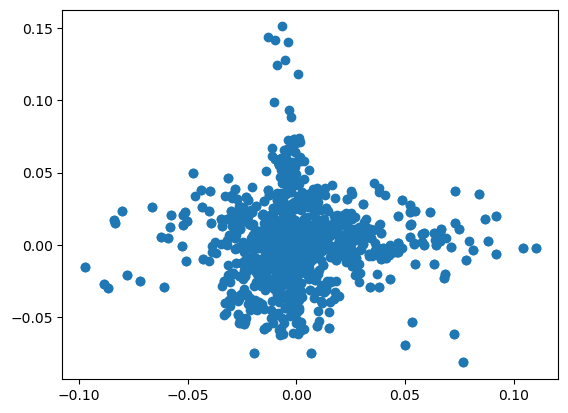

In [36]:
import matplotlib.pyplot as plt

plt.scatter(pc.loadings.iloc[:,0], pc.loadings.iloc[:,1])

(-0.1, 0.1)

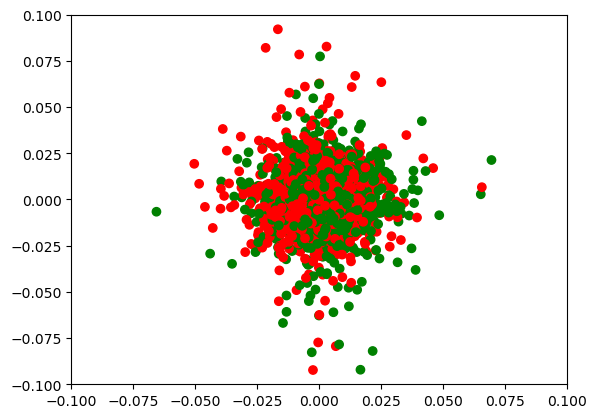

In [47]:
colormap = np.array(['red','green'])
plt.scatter(pc.scores.iloc[:,0], pc.scores.iloc[:,1], c=colormap[y_train])
plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.1)